https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [3]:

data= pd.read_csv('ScrapeImage.csv')
data.drop(['SENTIMENT','POLARITY'], inplace=True, axis=1, errors='ignore')
data=data.dropna()

In [4]:
data

,URL_ID,ARTICLE_LINK,ABSTRACT,DATE,Language,IMAGE_LINK,URL_ID.1,URL_LINK,WEBSITE_NAME,KEYWORD
0,1,https://globalnews.ca/news/5763807/new-ndp-ads...,Negative campaign ads are nothing new in polit...,<span>10 hours ago</span>,en,https://shawglobalnews.files.wordpress.com/201...,1,https://globalnews.ca/search/politics/,GlobalNews,politics
1,2,https://globalnews.ca/news/5766066/defence-min...,The unprecedented request follows several trou...,<span>6 hours ago</span>,en,https://shawglobalnews.files.wordpress.com/201...,2,https://globalnews.ca/search/politics/,GlobalNews,politics
2,3,https://globalnews.ca/news/5764442/snc-lavalin...,Here's a timeline of how the SNC-Lavalin affai...,<span>6 hours ago</span>,en,https://i0.wp.com/media.globalnews.ca/videosta...,3,https://globalnews.ca/search/politics/,GlobalNews,politics
3,4,https://globalnews.ca/news/5747914/peoples-par...,"In a policy plank released Friday, Maxime Bern...","<span>August 13, 2019</span>",en,https://i1.wp.com/media.globalnews.ca/videosta...,4,https://globalnews.ca/search/politics/,GlobalNews,politics
4,5,https://globalnews.ca/news/5720024/justin-trud...,"""More work needs to be done,"" says Sen. Dennis...","<span>August 4, 2019</span>",en,https://i2.wp.com/media.globalnews.ca/videosta...,5,https://globalnews.ca/search/politics/,GlobalNews,politics
5,6,https://globalnews.ca/news/5478902/helena-jacz...,Voters in Markham-Stouffville could have a cho...,"<span>July 10, 2019</span>",en,https://i2.wp.com/media.globalnews.ca/videosta...,6,https://globalnews.ca/search/politics/,GlobalNews,politics
6,7,https://globalnews.ca/news/5226181/mefloquine-...,The federal government is now facing three law...,"<span>May 1, 2019</span>",en,https://i0.wp.com/media.globalnews.ca/videosta...,7,https://globalnews.ca/search/politics/,GlobalNews,politics
7,8,https://globalnews.ca/news/5697552/ford-govern...,"In a release, the Ontario government said it w...","<span>July 29, 2019</span>",en,https://i0.wp.com/media.globalnews.ca/videosta...,8,https://globalnews.ca/search/politics/,GlobalNews,politics
8,9,https://globalnews.ca/news/5693007/david-capla...,"""We are deeply saddened and shocked by his sud...","<span>July 27, 2019</span>",en,https://shawglobalnews.files.wordpress.com/201...,9,https://globalnews.ca/search/politics/,GlobalNews,politics
9,10,https://globalnews.ca/news/5658649/trump-tweet...,"This past Sunday, U.S. President Donald Trump ...","<span>July 21, 2019</span>",en,https://i1.wp.com/media.globalnews.ca/videosta...,10,https://globalnews.ca/search/politics/,GlobalNews,politics


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in data['ABSTRACT']:
    pol_score = sia.polarity_scores(line)
    pol_score['ABSTRACT'] = line
    results.append(pol_score)

pprint(results[:2], width=100)

[{'ABSTRACT': "Negative campaign ads are nothing new in politics, but there's something new to the "
              'provincial campaign this year: salty language in a political advertisement.',
  'compound': -0.3291,
  'neg': 0.097,
  'neu': 0.903,
  'pos': 0.0},
 {'ABSTRACT': 'The unprecedented request follows several troubling incidents and reports linking '
              'some service members to right-wing extremism and hate groups, including '
              'white-supremacist organizations.',
  'compound': -0.802,
  'neg': 0.265,
  'neu': 0.735,
  'pos': 0.0}]


In [6]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,ABSTRACT
0,0.097,0.903,0.000,-0.3291,Negative campaign ads are nothing new in polit...
1,0.265,0.735,0.000,-0.8020,The unprecedented request follows several trou...
2,0.000,1.000,0.000,0.0000,Here's a timeline of how the SNC-Lavalin affai...
3,0.062,0.779,0.159,0.4767,"In a policy plank released Friday, Maxime Bern..."
4,0.000,1.000,0.000,0.0000,"""More work needs to be done,"" says Sen. Dennis..."


In [7]:
df['index']=np.arange(len(df))
df.head()

,neg,neu,pos,compound,ABSTRACT,index
0,0.097,0.903,0.000,-0.3291,Negative campaign ads are nothing new in polit...,0
1,0.265,0.735,0.000,-0.8020,The unprecedented request follows several trou...,1
2,0.000,1.000,0.000,0.0000,Here's a timeline of how the SNC-Lavalin affai...,2
3,0.062,0.779,0.159,0.4767,"In a policy plank released Friday, Maxime Bern...",3
4,0.000,1.000,0.000,0.0000,"""More work needs to be done,"" says Sen. Dennis...",4


In [8]:
#most negative news
df.sort_values(by=['compound']).head(2)

,neg,neu,pos,compound,ABSTRACT,index
45,0.383,0.617,0.0,-0.9360,In an update released by police Saturday night...,45
18,0.431,0.569,0.0,-0.9022,The 54-year-old died last Wednesday in what hi...,18


In [9]:
#most positive news
df.sort_values(by=['compound']).tail(5)


,neg,neu,pos,compound,ABSTRACT,index
82,0.000,0.821,0.179,0.6872,The new rules will make it easier for seniors ...,82
96,0.064,0.709,0.227,0.6956,Canadian provinces have confiscated tens of mi...,96
13,0.075,0.646,0.279,0.7184,Each party has virtually an even three-way spl...,13
52,0.000,0.559,0.441,0.7964,"""Truly best move I have ever made,"" the celebr...",52
33,0.000,0.774,0.226,0.8847,"The plan for the $550-million event centre, wh...",33


In [10]:
df2=data[['ABSTRACT','KEYWORD']]
df2['index']=np.arange(len(df2))
df2.head()

C:\Users\dojin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ABSTRACT,KEYWORD,index
0,Negative campaign ads are nothing new in polit...,politics,0
1,The unprecedented request follows several trou...,politics,1
2,Here's a timeline of how the SNC-Lavalin affai...,politics,2
3,"In a policy plank released Friday, Maxime Bern...",politics,3
4,"""More work needs to be done,"" says Sen. Dennis...",politics,4


In [11]:
df3=pd.merge(df, df2,on='index')
df4=df3[['index','neg','neu','pos','compound','ABSTRACT_x','KEYWORD']]
df4.head()

,index,neg,neu,pos,compound,ABSTRACT_x,KEYWORD
0,0,0.097,0.903,0.000,-0.3291,Negative campaign ads are nothing new in polit...,politics
1,1,0.265,0.735,0.000,-0.8020,The unprecedented request follows several trou...,politics
2,2,0.000,1.000,0.000,0.0000,Here's a timeline of how the SNC-Lavalin affai...,politics
3,3,0.062,0.779,0.159,0.4767,"In a policy plank released Friday, Maxime Bern...",politics
4,4,0.000,1.000,0.000,0.0000,"""More work needs to be done,"" says Sen. Dennis...",politics


In [12]:
df = df4.rename(columns = {'ABSTRACT_x': 'ABSTRACT'})
df.head()

,index,neg,neu,pos,compound,ABSTRACT,KEYWORD
0,0,0.097,0.903,0.000,-0.3291,Negative campaign ads are nothing new in polit...,politics
1,1,0.265,0.735,0.000,-0.8020,The unprecedented request follows several trou...,politics
2,2,0.000,1.000,0.000,0.0000,Here's a timeline of how the SNC-Lavalin affai...,politics
3,3,0.062,0.779,0.159,0.4767,"In a policy plank released Friday, Maxime Bern...",politics
4,4,0.000,1.000,0.000,0.0000,"""More work needs to be done,"" says Sen. Dennis...",politics


In [13]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,index,neg,neu,pos,compound,ABSTRACT,KEYWORD,label
0,0,0.097,0.903,0.000,-0.3291,Negative campaign ads are nothing new in polit...,politics,-1
1,1,0.265,0.735,0.000,-0.8020,The unprecedented request follows several trou...,politics,-1
2,2,0.000,1.000,0.000,0.0000,Here's a timeline of how the SNC-Lavalin affai...,politics,0
3,3,0.062,0.779,0.159,0.4767,"In a policy plank released Friday, Maxime Bern...",politics,1
4,4,0.000,1.000,0.000,0.0000,"""More work needs to be done,"" says Sen. Dennis...",politics,0


In [14]:
print("Positive ABSTRACT:\n")
pprint(list(df[df['label'] == 1].ABSTRACT)[:5], width=200)

print("\nNegative ABSTRACT:\n")
pprint(list(df[df['label'] == -1].ABSTRACT)[:5], width=200)

Positive ABSTRACT:

["In a policy plank released Friday, Maxime Bernier's People's Party of Canada (PPC) vowed to scrap the Multiculturalism Act if elected and cancel all funding that promotes the concept.",
 'Each party has virtually an even three-way split of popular support as the PC government hits the ground running with cuts to spending',
 'One government source told Global News officials have been negotiating a provisional trade agreement with the U.K. behind the scenes.',
 "Ottawa wrote off $2.6 billion last year that it wouldn't collect from Chrysler, and a spokeswoman for Ontario Finance Minister Rod Phillips says once that happened, the province had no legal "
 'recourse to recover outstanding money.',
 'Chinese state media claimed that the exercises had been planned before hand and were not directly related to the unrest in\xa0Hong\xa0Kong.']

Negative ABSTRACT:

["Negative campaign ads are nothing new in politics, but there's something new to the provincial campaign this y

In [15]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    42
-1    32
 1    25
Name: label, dtype: int64
 0    42.424242
-1    32.323232
 1    25.252525
Name: label, dtype: float64


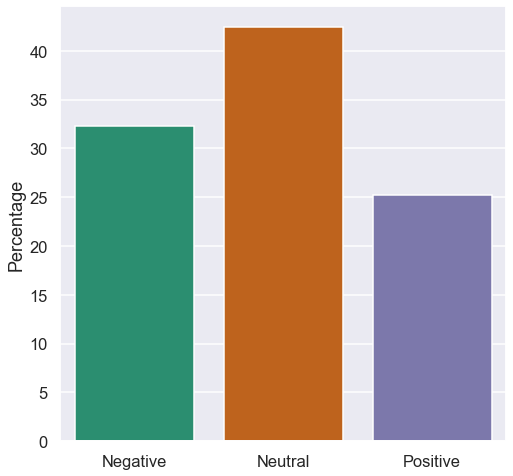

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [17]:
df.groupby(['KEYWORD']).mean()

,index,neg,neu,pos,compound,label
KEYWORD,,,,,,
entertainment,61.0,0.087840,0.835520,0.076640,-0.049392,-0.120000
money,86.0,0.081880,0.834000,0.084120,0.017032,0.040000
politics,12.0,0.092680,0.863720,0.043600,-0.101440,-0.160000
sports,36.5,0.111917,0.819125,0.068958,-0.119808,-0.041667


In [18]:
df.groupby(['KEYWORD']).count()

,index,neg,neu,pos,compound,ABSTRACT,label
KEYWORD,,,,,,,
entertainment,25,25,25,25,25,25,25
money,25,25,25,25,25,25,25
politics,25,25,25,25,25,25,25
sports,24,24,24,24,24,24,24


In [19]:
ent=df[df['KEYWORD']=='entertainment']
ent

,index,neg,neu,pos,compound,ABSTRACT,KEYWORD,label
49,49,0.000,0.887,0.113,0.4215,"At Tuesday's meeting, renewal of the adult ent...",entertainment,1
50,50,0.000,0.842,0.158,0.4902,“Roc Nation is one of the most globally influe...,entertainment,1
51,51,0.286,0.714,0.000,-0.7783,Aaron Carter's filing alleges that Lina Valent...,entertainment,-1
52,52,0.000,0.559,0.441,0.7964,"""Truly best move I have ever made,"" the celebr...",entertainment,1
53,53,0.182,0.818,0.000,-0.4404,Todd Chrisley denied any wrongdoing in an Inst...,entertainment,-1
54,54,0.091,0.909,0.000,-0.2960,"""I just throw you away and start over? No, I c...",entertainment,-1
55,55,0.360,0.640,0.000,-0.5423,Pictures from the scene show both vehicles wit...,entertainment,-1
56,56,0.000,1.000,0.000,0.0000,Here is what we know about Kam McLeod and Brye...,entertainment,0
57,57,0.000,1.000,0.000,0.0000,The bodies of two people found along the Alask...,entertainment,0
58,58,0.000,1.000,0.000,0.0000,"Tickets for OVO Fest go on sale Friday, July 12.",entertainment,0


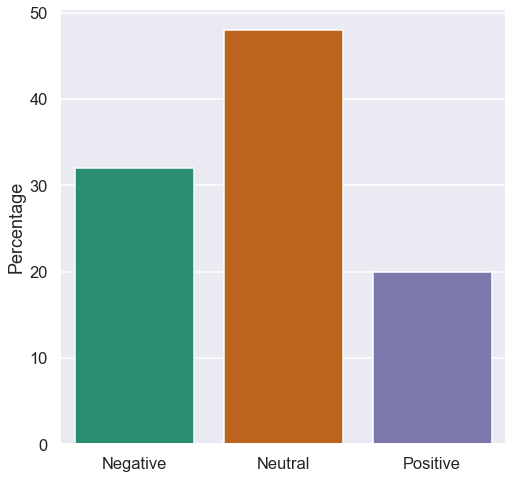

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = ent.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [21]:
mon=df[df['KEYWORD']=='money']
mon

,index,neg,neu,pos,compound,ABSTRACT,KEYWORD,label
74,74,0.213,0.787,0.000,-0.5859,RCMP in the Okanagan said these kind of elabor...,money,-1
75,75,0.122,0.751,0.127,0.0258,Manitoba's Progressive Conservatives are promi...,money,0
76,76,0.215,0.565,0.220,0.0240,The BC Unclaimed Property Society says the sca...,money,0
77,77,0.000,0.840,0.160,0.6124,Premier Scott Moe says Saskatchewan will contr...,money,1
78,78,0.212,0.746,0.042,-0.7717,Four Peel Regional Police officers admitted Tu...,money,-1
79,79,0.000,0.924,0.076,0.1027,Saving for retirement is important — but so is...,money,0
80,80,0.139,0.794,0.067,-0.4215,The anti-money laundering measures are a respo...,money,-1
81,81,0.228,0.772,0.000,-0.6808,Authorities have laid charges against 17 peopl...,money,-1
82,82,0.000,0.821,0.179,0.6872,The new rules will make it easier for seniors ...,money,1
83,83,0.203,0.797,0.000,-0.4215,Check out these tips for saving money during t...,money,-1


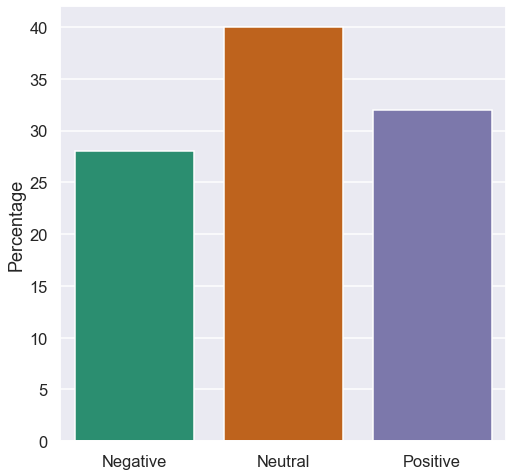

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = mon.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [23]:
pol=df[df['KEYWORD']=='politics']
pol

,index,neg,neu,pos,compound,ABSTRACT,KEYWORD,label
0,0,0.097,0.903,0.000,-0.3291,Negative campaign ads are nothing new in polit...,politics,-1
1,1,0.265,0.735,0.000,-0.8020,The unprecedented request follows several trou...,politics,-1
2,2,0.000,1.000,0.000,0.0000,Here's a timeline of how the SNC-Lavalin affai...,politics,0
3,3,0.062,0.779,0.159,0.4767,"In a policy plank released Friday, Maxime Bern...",politics,1
4,4,0.000,1.000,0.000,0.0000,"""More work needs to be done,"" says Sen. Dennis...",politics,0
5,5,0.000,1.000,0.000,0.0000,Voters in Markham-Stouffville could have a cho...,politics,0
6,6,0.091,0.909,0.000,-0.1531,The federal government is now facing three law...,politics,0
7,7,0.000,1.000,0.000,0.0000,"In a release, the Ontario government said it w...",politics,0
8,8,0.326,0.674,0.000,-0.8795,"""We are deeply saddened and shocked by his sud...",politics,-1
9,9,0.114,0.830,0.057,-0.3182,"This past Sunday, U.S. President Donald Trump ...",politics,-1


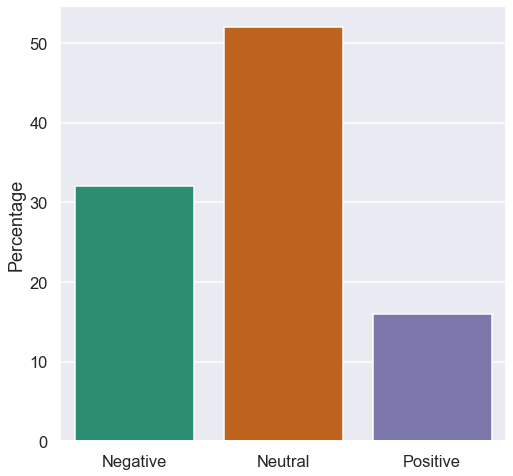

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = pol.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [25]:
spo=df[df['KEYWORD']=='sports']
spo

,index,neg,neu,pos,compound,ABSTRACT,KEYWORD,label
25,25,0.000,0.873,0.127,0.4939,Chinese state media claimed that the exercises...,sports,1
26,26,0.000,1.000,0.000,0.0000,The former captain of India's national soccer ...,sports,0
27,27,0.000,0.842,0.158,0.4902,“Roc Nation is one of the most globally influe...,sports,1
28,28,0.000,0.803,0.197,0.4927,Have a craving for a really good sports-themed...,sports,1
29,29,0.327,0.573,0.100,-0.8360,The statement of defence alleges Hague assumed...,sports,-1
30,30,0.133,0.765,0.102,-0.1860,WARNING: This story contains graphic details. ...,sports,0
31,31,0.081,0.919,0.000,-0.2584,Graham DeLaet said he expects to be back on th...,sports,-1
32,32,0.293,0.707,0.000,-0.7717,"After beating the Netherlands 2-0, Team USA so...",sports,-1
33,33,0.000,0.774,0.226,0.8847,"The plan for the $550-million event centre, wh...",sports,1
34,34,0.261,0.739,0.000,-0.7717,Chuckwagon driver Chad Harden has been fined a...,sports,-1


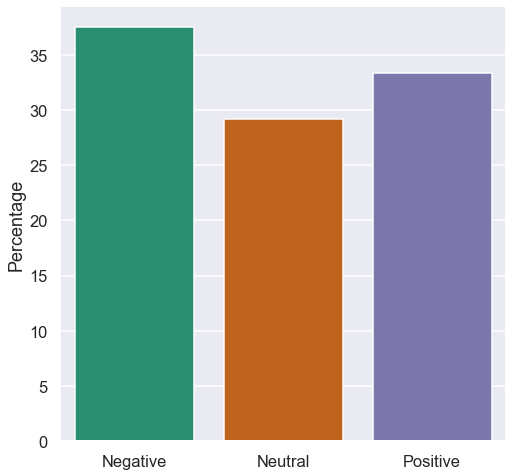

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = spo.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [27]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one.'try it!'"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one', '.', "'try", 'it', '!', "'"]


In [28]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one',
 'try',
 'it']

In [29]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [30]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [31]:
pos_lines = list(df[df.label == 1].ABSTRACT)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('entertainment', 6),
 ('sports', 4),
 ('toronto', 4),
 ('canada', 3),
 ('one', 3),
 ('million', 3),
 ('new', 3),
 ('policy', 2),
 ('party', 2),
 ('funding', 2),
 ('three', 2),
 ('government', 2),
 ('ottawa', 2),
 ('wrote', 2),
 ('last', 2),
 ('year', 2),
 ('says', 2),
 ('money', 2),
 ('hand', 2),
 ('roc', 2)]

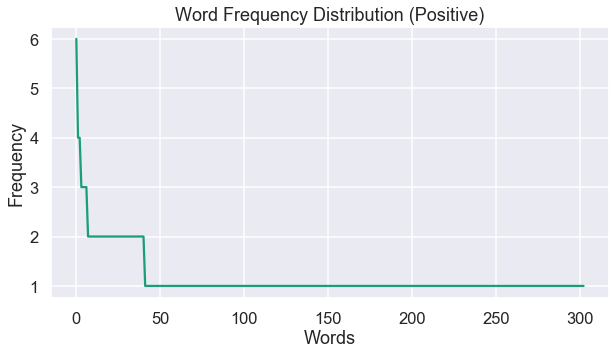

In [32]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [33]:
#y_val[0::4] # 0 에서 끝까지 4칸씩 점프해서 보기

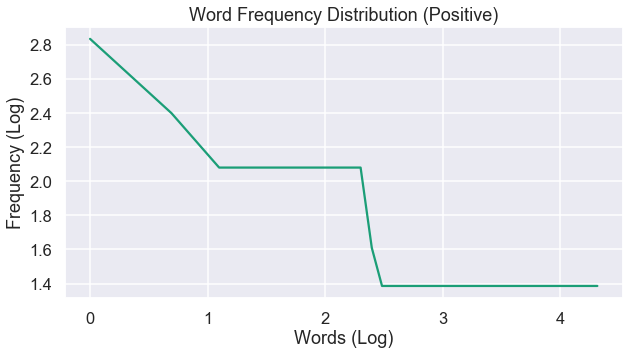

In [34]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [35]:
df2 = df[['ABSTRACT', 'label']]
df2.head()

,ABSTRACT,label
0,Negative campaign ads are nothing new in polit...,-1
1,The unprecedented request follows several trou...,-1
2,Here's a timeline of how the SNC-Lavalin affai...,0
3,"In a policy plank released Friday, Maxime Bern...",1
4,"""More work needs to be done,"" says Sen. Dennis...",0


In [36]:
neg_lines = list(df2[df2.label == -1].ABSTRACT)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('said', 5),
 ('death', 3),
 ('home', 3),
 ('fire', 3),
 ('north', 3),
 ('toronto', 3),
 ('police', 3),
 ('money', 3),
 ('campaign', 2),
 ('new', 2),
 ('year', 2),
 ('several', 2),
 ('reports', 2),
 ('54', 2),
 ('us', 2),
 ('statement', 2),
 ('family', 2),
 ('sunday', 2),
 ('p', 2),
 ('emergency', 2)]

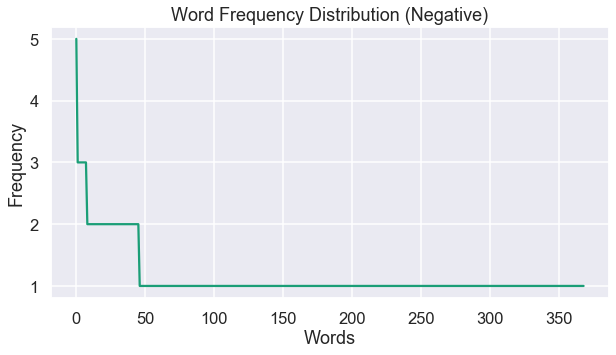

In [37]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

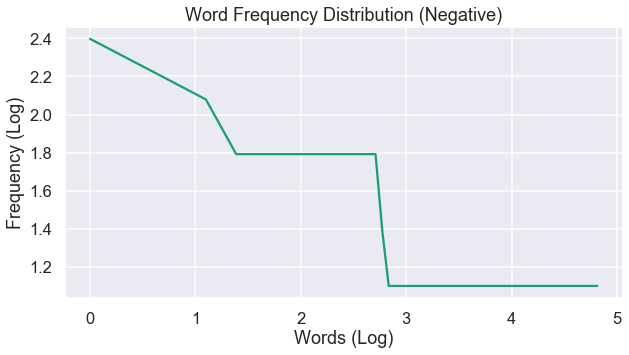

In [38]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

https://www.learndatasci.com/tutorials/predicting-reddit-news-sentiment-naive-bayes-text-classifiers/

In [39]:
df2

,ABSTRACT,label
0,Negative campaign ads are nothing new in polit...,-1
1,The unprecedented request follows several trou...,-1
2,Here's a timeline of how the SNC-Lavalin affai...,0
3,"In a policy plank released Friday, Maxime Bern...",1
4,"""More work needs to be done,"" says Sen. Dennis...",0
5,Voters in Markham-Stouffville could have a cho...,0
6,The federal government is now facing three law...,0
7,"In a release, the Ontario government said it w...",0
8,"""We are deeply saddened and shocked by his sud...",-1
9,"This past Sunday, U.S. President Donald Trump ...",-1


In [40]:
df = df2[df2.label != 0]
df.label.value_counts()

-1    32
 1    25
Name: label, dtype: int64

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

s1 = "Senate panel moving ahead with Mueller bill despite McConnell opposition"
s2 = "Bill protecting Robert Mueller to get vote despite McConnell opposition"
s3 = "bill bill bill"

vect = CountVectorizer(binary=True)
vect


CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [42]:
X = vect.fit_transform([s1, s2, s3])

X.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [43]:
list(zip(X.toarray()[0], vect.get_feature_names()))

[(1, 'ahead'),
 (1, 'bill'),
 (1, 'despite'),
 (0, 'get'),
 (1, 'mcconnell'),
 (1, 'moving'),
 (1, 'mueller'),
 (1, 'opposition'),
 (1, 'panel'),
 (0, 'protecting'),
 (0, 'robert'),
 (1, 'senate'),
 (0, 'to'),
 (0, 'vote'),
 (1, 'with')]

In [44]:
list(zip(X.toarray()[1], vect.get_feature_names()))

[(0, 'ahead'),
 (1, 'bill'),
 (1, 'despite'),
 (1, 'get'),
 (1, 'mcconnell'),
 (0, 'moving'),
 (1, 'mueller'),
 (1, 'opposition'),
 (0, 'panel'),
 (1, 'protecting'),
 (1, 'robert'),
 (0, 'senate'),
 (1, 'to'),
 (1, 'vote'),
 (0, 'with')]

In [45]:
list(zip(X.toarray()[2], vect.get_feature_names()))

[(0, 'ahead'),
 (1, 'bill'),
 (0, 'despite'),
 (0, 'get'),
 (0, 'mcconnell'),
 (0, 'moving'),
 (0, 'mueller'),
 (0, 'opposition'),
 (0, 'panel'),
 (0, 'protecting'),
 (0, 'robert'),
 (0, 'senate'),
 (0, 'to'),
 (0, 'vote'),
 (0, 'with')]

In [46]:
vect = CountVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(df.ABSTRACT)

X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [47]:
from sklearn.model_selection import train_test_split

X = df.ABSTRACT
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
X

0     Negative campaign ads are nothing new in polit...
1     The unprecedented request follows several trou...
3     In a policy plank released Friday, Maxime Bern...
8     "We are deeply saddened and shocked by his sud...
9     This past Sunday, U.S. President Donald Trump ...
10    At around 9:35 p.m., emergency crews were call...
13    Each party has virtually an even three-way spl...
14    The survey, which will run until Sept. 18, com...
18    The 54-year-old died last Wednesday in what hi...
20    One government source told Global News officia...
21    Pictures from the scene show both vehicles wit...
22    Ottawa wrote off $2.6 billion last year that i...
25    Chinese state media claimed that the exercises...
27    “Roc Nation is one of the most globally influe...
28    Have a craving for a really good sports-themed...
29    The statement of defence alleges Hague assumed...
31    Graham DeLaet said he expects to be back on th...
32    After beating the Netherlands 2-0, Team US

In [49]:
X_train

52    "Truly best move I have ever made," the celebr...
53    Todd Chrisley denied any wrongdoing in an Inst...
93    If you’re travelling to the southern United St...
27    “Roc Nation is one of the most globally influe...
49    At Tuesday's meeting, renewal of the adult ent...
54    "I just throw you away and start over? No, I c...
45    In an update released by police Saturday night...
82    The new rules will make it easier for seniors ...
20    One government source told Global News officia...
9     This past Sunday, U.S. President Donald Trump ...
18    The 54-year-old died last Wednesday in what hi...
39    Three women and a man were found dead in the h...
10    At around 9:35 p.m., emergency crews were call...
8     "We are deeply saddened and shocked by his sud...
38    Police believe there may be people who have bo...
43    "Emily was involved in an accident yesterday a...
36    After a disappointing showing in Montreal last...
32    After beating the Netherlands 2-0, Team US

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [51]:
counts = df.label.value_counts()
print(counts)

print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[-1] / sum(counts) * 100))

-1    32
 1    25
Name: label, dtype: int64

Predicting only -1 = 56.14% accuracy


In [52]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

Using TensorFlow backend.


[(-1, 24), (1, 24)]


In [53]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
nb.predict(X_train_vect)

array([ 1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1], dtype=int64)

In [55]:
nb.score(X_train_res, y_train_res)

1.0

In [56]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([ 1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 83.33%

F1 Score: 75.00

COnfusion Matrix:
 [[7 1]
 [1 3]]


In [58]:
from sklearn.model_selection import ShuffleSplit

X = df.ABSTRACT
y = df.label

ss = ShuffleSplit(n_splits=10, test_size=0.1)
sm = SMOTE(kind='regular',k_neighbors=1)

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))


Average accuracy across folds: 80.00%

Average F1 score across folds: 81.50%

Average Confusion Matrix across folds: 
 [[2.1 0.8]
 [0.4 2.7]]


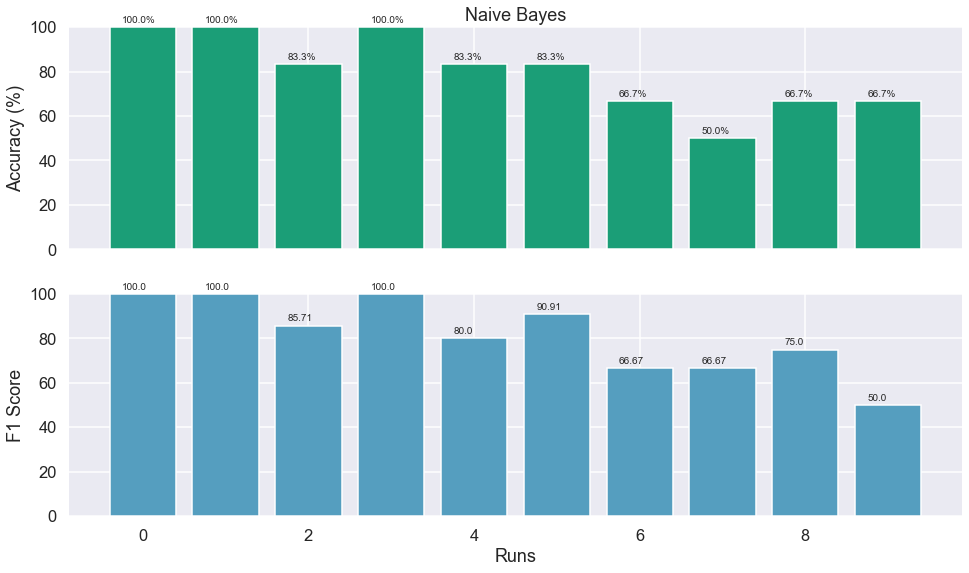

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [60]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

X = df.ABSTRACT
y = df.label

cv = ShuffleSplit(n_splits=20, test_size=0.2)

models = [
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    MLPClassifier()
]

sm = SMOTE(kind='regular',k_neighbors=1)

# Init a dictionary for storing results of each run for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}

for train_index, test_index in cv.split(X):
    X_train, X_test  = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_vect = vect.fit_transform(X_train)    
    X_test_vect = vect.transform(X_test)
    
    X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
# We now have a bunch of accuracy scores, f1 scores, and confusion matrices stored for each model. Let's average these together to get average scores across models and folds:

for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        """
    print(s)

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

MultinomialNB
------------------------------
        Avg. Accuracy: 66.25%
        Avg. F1 Score: 61.74
        Avg. Confusion Matrix: 
        
[[4.35 2.45]
 [1.6  3.6 ]]
        
BernoulliNB
------------------------------
        Avg. Accuracy: 60.00%
        Avg. F1 Score: 60.60
        Avg. Confusion Matrix: 
        
[[2.8 4. ]
 [0.8 4.4]]
        
LogisticRegression
------------------------------
        Avg. Accuracy: 57.08%
        Avg. F1 Score: 55.53
        Avg. Confusion Matrix: 
        
[[3.35 3.45]
 [1.7  3.5 ]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 55.42%
        Avg. F1 Score: 52.88
        Avg. Confusion Matrix: 
        
[[3.4  3.4 ]
 [1.95 3.25]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 55.00%
        Avg. F1 Score: 55.90
        Avg. Confusion Matrix: 
        
[[2.85 3.95]
 [1.45 3.75]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy: 57.50%
        Avg. F1 

In [61]:
from collections import Counter
wordDict = Counter()

for i in range(len(df2['ABSTRACT'])): #한 row씩
    for word in df2['ABSTRACT'][i].split(): #한 문장에 들어있는 한 단어씩
        wordDict[word] += 1 #Counter에 count를 1씩 증가시킨다. 

In [62]:
wordDict

Counter({'Negative': 1,
         'campaign': 2,
         'ads': 1,
         'are': 13,
         'nothing': 1,
         'new': 7,
         'in': 39,
         'politics,': 1,
         'but': 7,
         "there's": 1,
         'something': 1,
         'to': 49,
         'the': 80,
         'provincial': 1,
         'this': 7,
         'year:': 1,
         'salty': 1,
         'language': 1,
         'a': 44,
         'political': 2,
         'advertisement.': 1,
         'The': 30,
         'unprecedented': 1,
         'request': 1,
         'follows': 1,
         'several': 2,
         'troubling': 1,
         'incidents': 1,
         'and': 46,
         'reports': 2,
         'linking': 1,
         'some': 2,
         'service': 1,
         'members': 2,
         'right-wing': 1,
         'extremism': 1,
         'hate': 1,
         'groups,': 1,
         'including': 2,
         'white-supremacist': 1,
         'organizations.': 1,
         "Here's": 2,
         'timeline': 1,
        

In [63]:
wordDict.most_common(10)

[('the', 80),
 ('to', 49),
 ('and', 46),
 ('a', 44),
 ('of', 43),
 ('in', 39),
 ('The', 30),
 ('for', 22),
 ('on', 19),
 ('with', 18)]

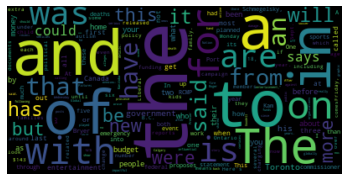

In [64]:
from wordcloud import WordCloud
wordcloud = WordCloud()

wc = WordCloud().generate_from_frequencies(wordDict)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
from nltk import Text

text=[]
for i in range(len(df2['ABSTRACT'])): #한 row씩
    txt = Text(tokenizer.tokenize(df2['ABSTRACT'][i]))
    text.append(txt)


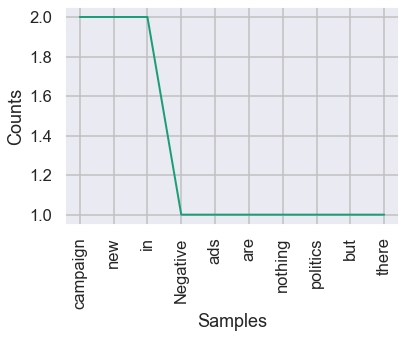

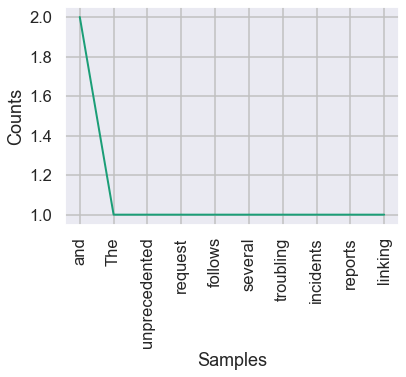

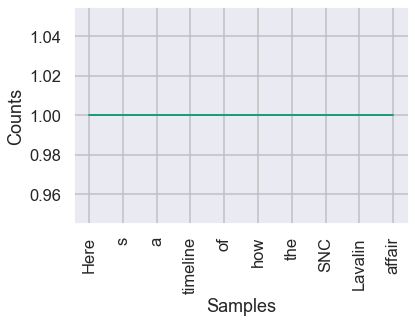

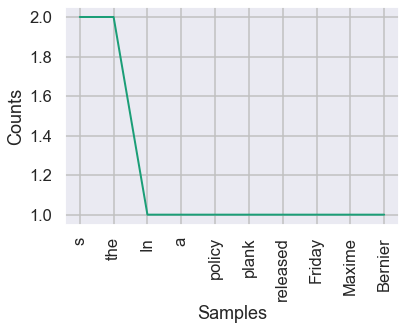

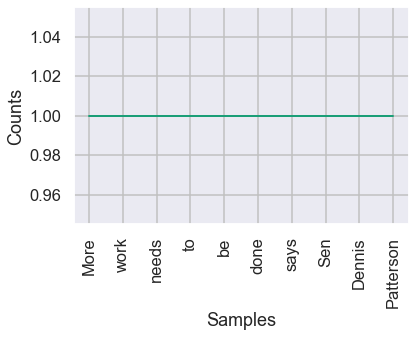

In [66]:
for i in range(len(text)):
    text[i].plot(10)
    
    if (i == 4):
        break
    
plt.show()


In [67]:
text = " ".join(summary for summary in df2['ABSTRACT'].unique())
print ("There are {} words in the combination of all tag word.".format(len(text)))

There are 11805 words in the combination of all tag word.


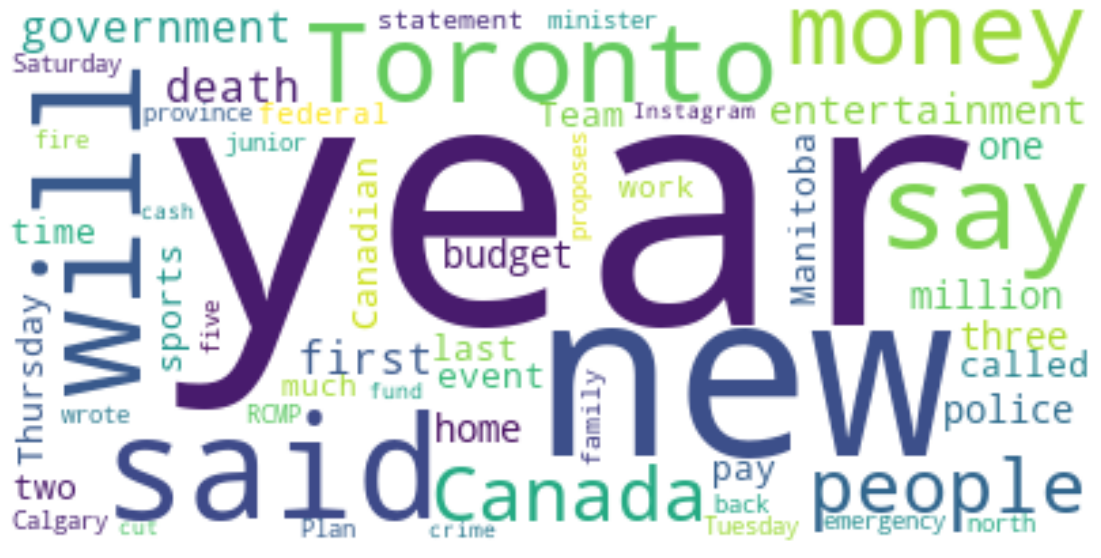

In [68]:
#total data word

# Create stopword list:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
postext = " ".join(summary for summary in pos_lines)
print ("There are {} words in the combination of all tag word.".format(len(postext)))

There are 3562 words in the combination of all tag word.


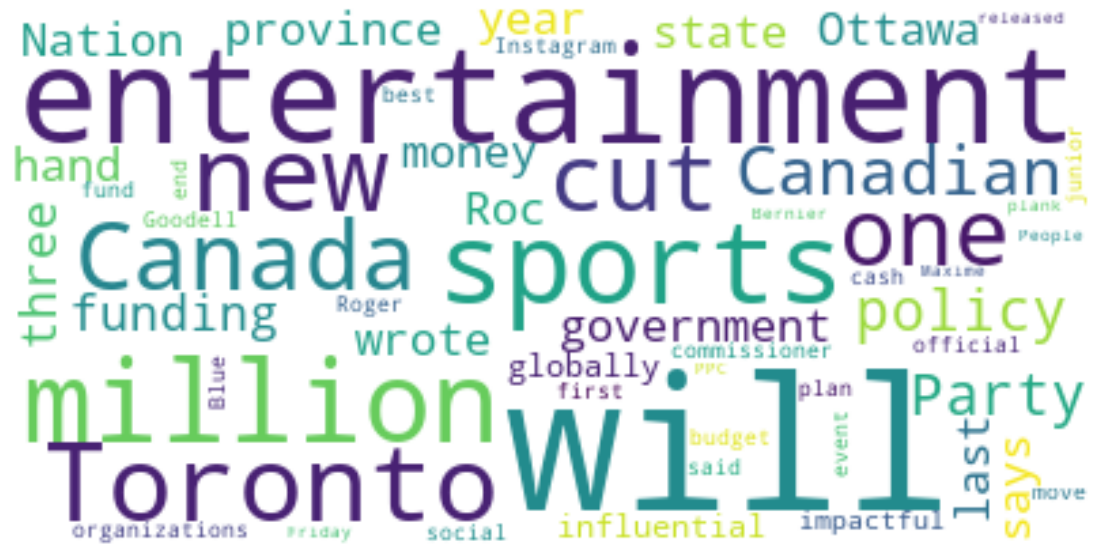

In [70]:
#positive word

# Create stopword list:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(postext)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [71]:
negtext = " ".join(summary for summary in neg_lines)
print ("There are {} words in the combination of all tag word.".format(len(negtext)))

There are 4125 words in the combination of all tag word.


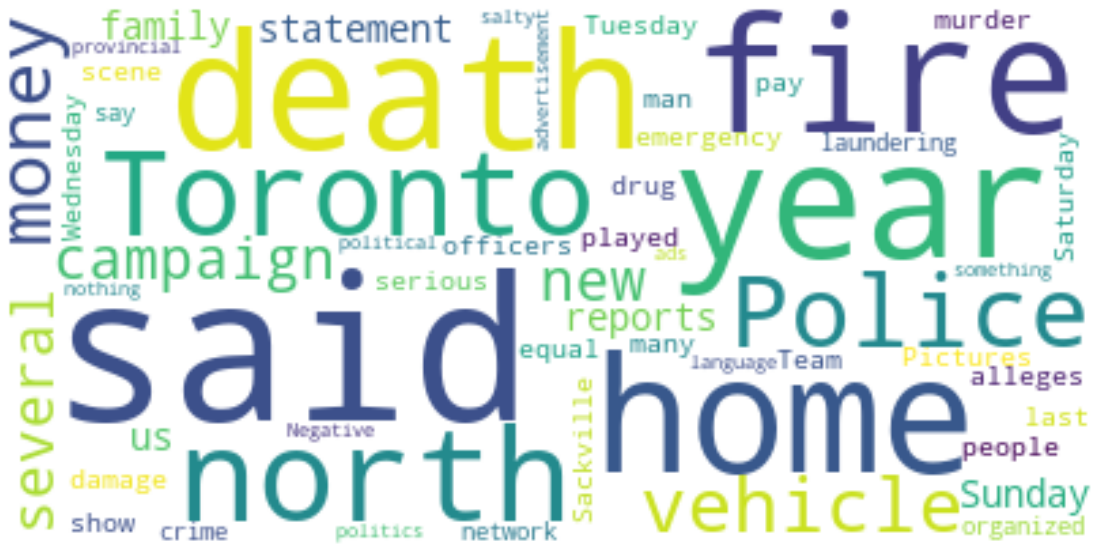

In [72]:
#negative word

#Create stopword list:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(negtext)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
from nltk import Text

Text = Text(tokenizer.tokenize(negtext))

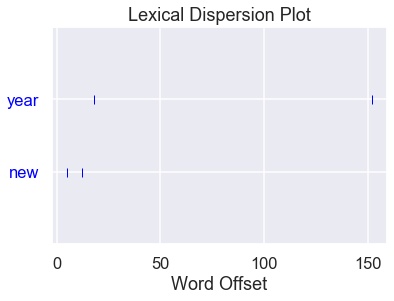

In [74]:
Text.dispersion_plot(["year","new"])

In [75]:
Text.concordance("year")

Displaying 2 of 2 matches:
 new to the provincial campaign this year salty language in a political advert
gs straws and food containers The 54 year old died last Wednesday in what his 


In [76]:
Text.similar("death")

statement


In [77]:
Text.common_contexts(["year", "money"])

No common contexts were found


In [78]:
ent = " ".join(summary for summary in ent['ABSTRACT'].unique())
print ("There are {} words in the combination of all tag word.".format(len(ent)))

There are 2757 words in the combination of all tag word.


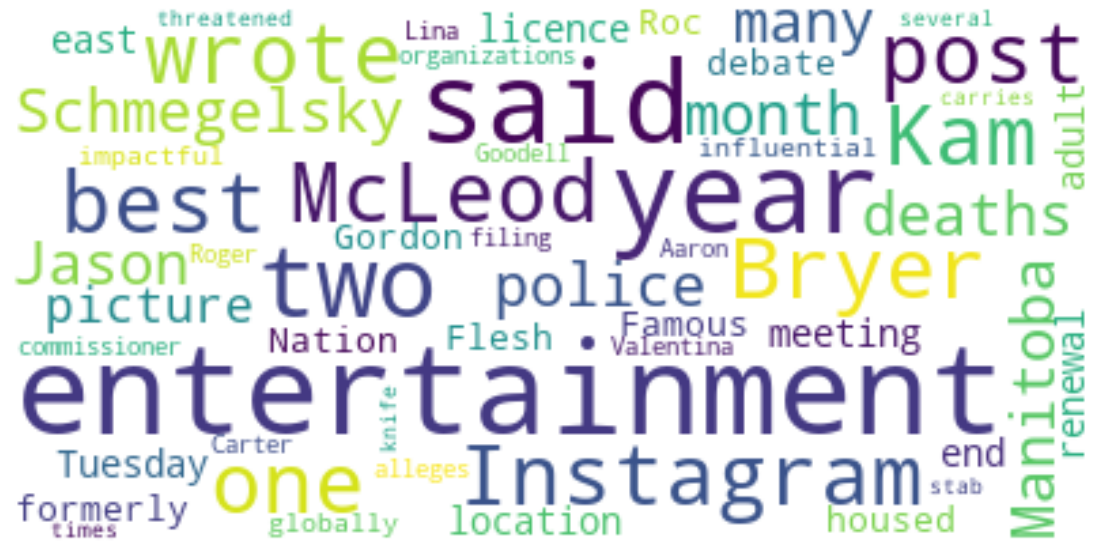

In [79]:
# entertainment word

#Create stopword list:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(ent)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
mon = " ".join(summary for summary in mon['ABSTRACT'].unique())
print ("There are {} words in the combination of all tag word.".format(len(mon)))

There are 3007 words in the combination of all tag word.


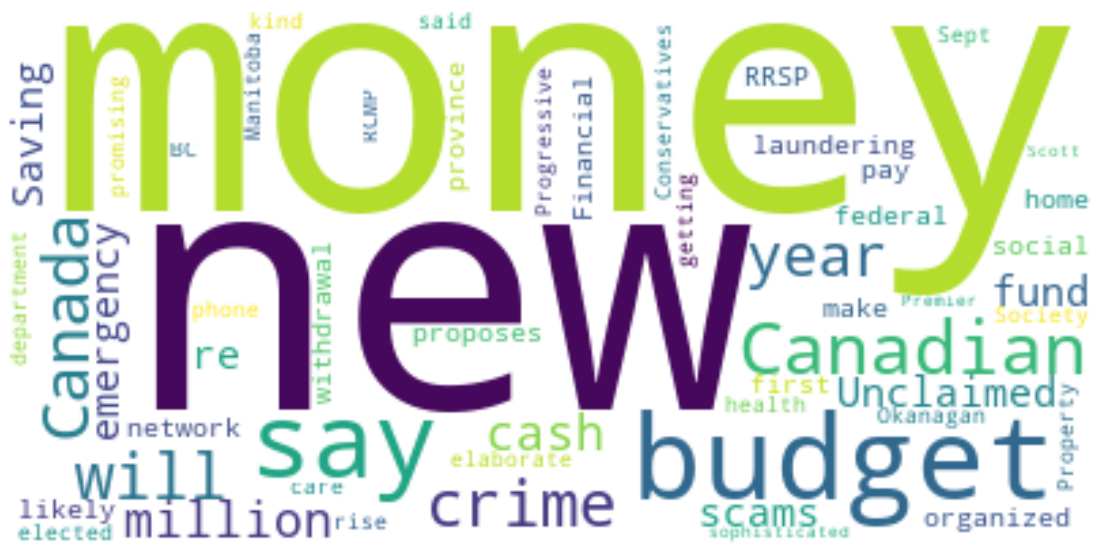

In [81]:
# money word

#Create stopword list:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(mon)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
pol = " ".join(summary for summary in pol['ABSTRACT'].unique())
print ("There are {} words in the combination of all tag word.".format(len(pol)))

There are 3335 words in the combination of all tag word.


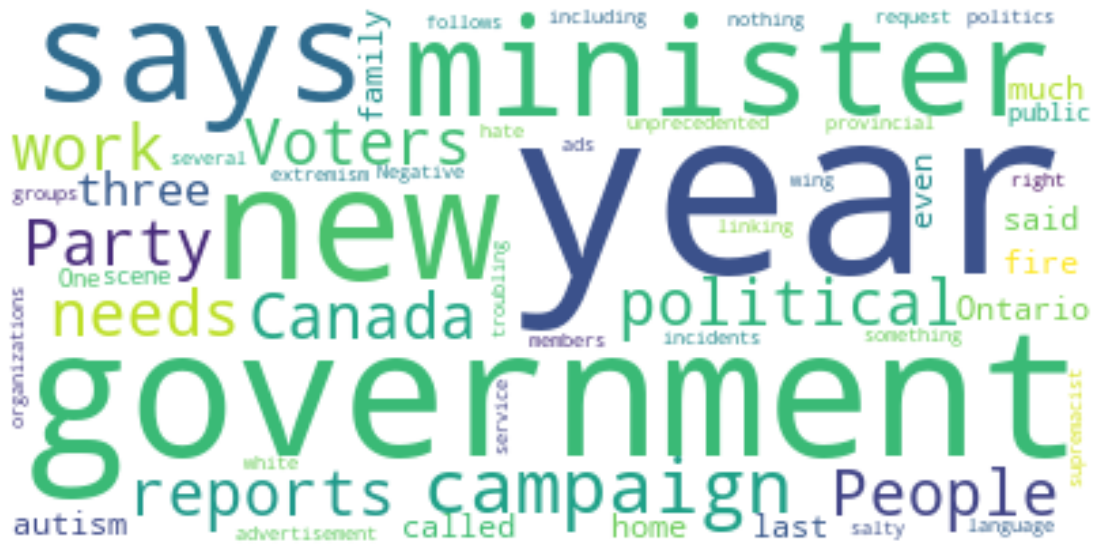

In [83]:
# politic word

#Create stopword list:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(pol)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
spo = " ".join(summary for summary in spo['ABSTRACT'].unique())
print ("There are {} words in the combination of all tag word.".format(len(spo)))

There are 3262 words in the combination of all tag word.


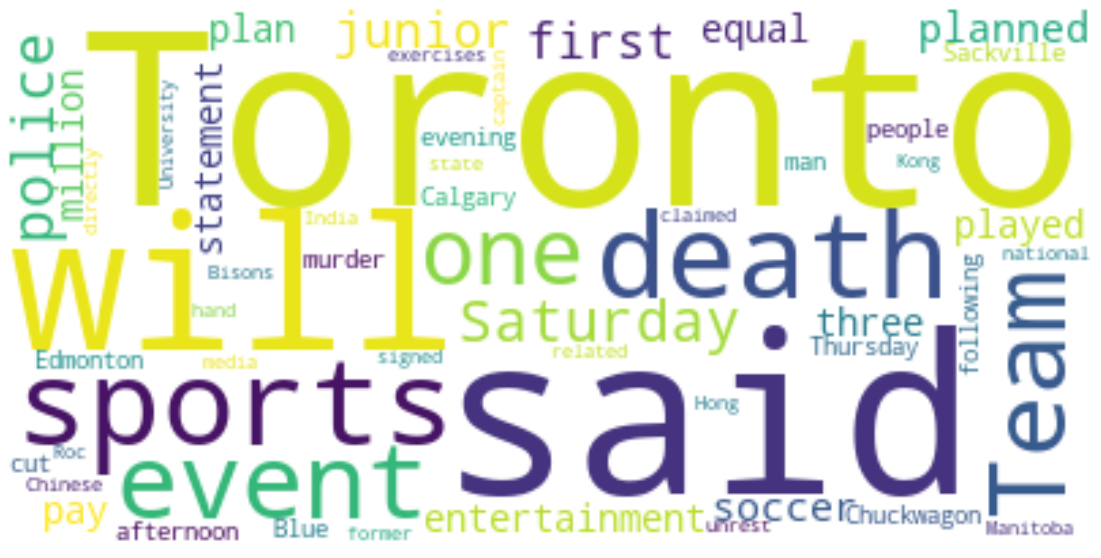

In [85]:
# sport word

#Create stopword list:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(spo)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()